Имеем входящий фрейм со слдеующими столбцами:  
    Name — название игры  
    Platform — платформа  
    Year_of_Release — год выпуска  
    Genre — жанр игры  
    NA_sales — продажи в Северной Америке (миллионы долларов)  
    EU_sales — продажи в Европе (миллионы долларов)  
    JP_sales — продажи в Японии (миллионы долларов)  
    Other_sales — продажи в других странах (миллионы долларов)  
    Critic_Score — оценка критиков (максимум 100)  
    User_Score — оценка пользователей (максимум 10)  
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Над фреймом и данными необходимо совершить следующие действия :  
1) обработать данные к последующему анализу (привести к нужным типа , обработать пропущенные данные, поправить названия столбцов, добавить стоблбец с суммарными продажами во всех регионах)  
2)  Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?  
    Посмотреть, как менялись продажи по платформам. Выберать платформы с наибольшими суммарными продажами и построить распределение по годам. Найти в какой характерный срок появляются новые и исчезают старые платформы.  
    Возять данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    Выберать несколько потенциально прибыльных платформ.  
    Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.  Посмотреть разницу в продажах игр на разных платформах .Велика ли разница в продажах?  
    Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.   
    Посмотреть на общее распределение игр по жанрам. Выделить самые прибыльные жанры и исследовать их, посмотреть выделяются ли жанры с высоким и низкими продажами Что можно сказать о самых прибыльных жанрах?  
3) Определить для пользователя каждого региона (NA, EU, JP):  
    Самые популярные платформы (топ-5). Описать различия в долях продаж.  
    Самые популярные жанры (топ-5).  
    Влияет ли рейтинг ESRB на продажи в отдельном регионе?  
4) Проверить гипотезы:  
    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
start_df = pd.read_csv('/datasets/games.csv')

In [3]:
start_df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Приведем названия колонок к нижнему регистру

In [4]:
new_column = ['name', 'platform','year_of_release','genre','na_sales', 'eu_sales','jp_sales','other_sales','critic_score','user_score','rating']
start_df.columns = new_column
start_df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [5]:
start_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Поменяем формат столбцов в следующих столбцах :  
год(на целые)
столбцы с оценками от критиков и пользователей (в формат float т.к. в последующем будем суммировать)  
Пропуски в столбцах с с оценками критиков,  пользователей,  для последующего преобразования типа данных этих столбцов к типу float(в наличии так же оценка tbd, если я правильно понимаю означает что оценки еще нет. так же пометим маркером ), заменим на невозможные значения , отсутсвтующие значения в колонке с годом релиза заменим так же невозможным значением(1970), пустые значения с рейтингом заменим дл наглядности на O. 

In [6]:
#start_df['year_of_release'].unique()
#start_df['rating'].unique()
#start_df['user_score'].unique()
#start_df['genre'].unique()

In [7]:
start_df['user_score'] = start_df['user_score'].fillna(-1)
start_df['year_of_release'] = start_df['year_of_release'].fillna(1970)
start_df['critic_score'] = start_df['critic_score'].fillna(0)
start_df['genre'] = start_df['genre'].fillna('no_data')
start_df['rating'] = start_df['rating'].fillna('O')
start_df.loc[start_df['user_score'] == 'tbd', 'user_score'] = -1
start_df['year_of_release'] = start_df['year_of_release'].astype('int')
start_df['user_score'] = start_df['user_score'].astype('float')
start_df['critic_score'] = start_df['critic_score'].astype('float')

Посчитаем суммарные продажи во 

In [8]:
start_df['region_sum']= start_df['na_sales'] +  start_df['eu_sales'] + start_df['jp_sales']
#start_df['region_sum']
start_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,region_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,-1.0,O,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,-1.0,O,30.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,-1.0,O,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,-1.0,O,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,-1.0,O,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,-1.0,O,0.01


Изменили тип данных в интересующих нас столбцах, пропуски в данных с оценками возможны связано с тем что для большей части игр с подобной проблемой не проводилось подобной оценки, некоторые пропуски присутствуют в связи с тем, что оценка еще не завершена.

Теперь перейдем к анализу данных. Для начала посчитаем количество выпущенных игр по годам.

Text(0, 0.5, 'Количество выпущенных игр')

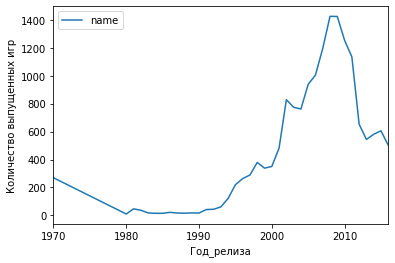

In [9]:
#year_count = start_df.groupby(['year_of_release'])['name'].count().reset_index()
year_count = start_df.pivot_table(index='year_of_release', values = 'name', aggfunc = 'count')
#year_count
year_count.plot()
plt.xlabel('Год_релиза')
plt.ylabel('Количество выпущенных игр')

В период 2006-2011 годах реализованных игр более 1000(похоже прямо таки бум был, а может и платформ было больше) с 2012 и далее в среднем 550 (именно этот период возьмем как актуальный)

Найдем топ 5 платформ по суммарным продажам игр

In [10]:
platform_year_sales = start_df.groupby(['platform','year_of_release'])['region_sum'].sum().reset_index()
platform_year_sales.columns = ['platform','year_of_release', 'sum']
platform_year_sales_plt = platform_year_sales.pivot_table(index = 'platform', values = 'sum', aggfunc = 'sum')
platform_top_5_sum = platform_year_sales_plt.sort_values(by = 'sum', ascending = False).head(5).reset_index()
list_top_5 = platform_top_5_sum['platform'].tolist()
list_top_5

['PS2', 'X360', 'Wii', 'PS3', 'DS']

Построим распределение продаж по годам для топ 5 платформ по годам

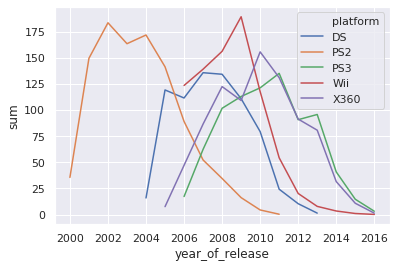

In [11]:
platform_top_5_sales = platform_year_sales.query('(platform in @list_top_5) & (year_of_release > 1999)')
sns.set(style="darkgrid")
sns.lineplot(x="year_of_release", y="sum",
             hue="platform",
             data=platform_top_5_sales)

Выведен график для платформ с наибольшими сумарными продажами . Из графика заменто что промежуток  между началом продаж и спадом до 0 примерно 10 лет

 Теперь рассмотрим платформы по продажам за актуальный период ( а не рекордсменов старичков). Актуальный период выбран  ранее(с 2012 года)

In [12]:
platform_actual = start_df .query('year_of_release > 2011')
platform_actual = platform_actual.groupby(['platform'])['region_sum'].sum().reset_index()
platform_top_5_actual = platform_actual.sort_values(by = 'region_sum', ascending = False).head(5).reset_index()
platform_top_5_actual


,index,platform,region_sum
0,4,PS4,265.79
1,3,PS3,245.53
2,9,X360,216.14
3,0,3DS,185.74
4,10,XOne,145.05


Нашли топ 5 платформ по продажам за актуальный период, посмотрим падают или растут для них продажи к концу периода

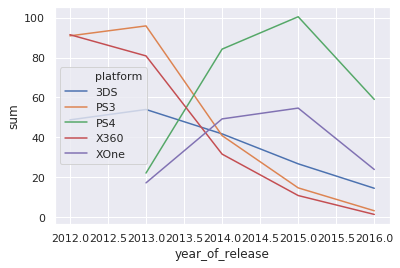

In [13]:
list_top_5_actual = platform_top_5_actual['platform'].tolist()
platform_top_5_actual_year = platform_year_sales.query('(platform in @list_top_5_actual) & (year_of_release > 2011)')
platform_top_5_actual_year
sns.set(style="darkgrid")
sns.lineplot(x="year_of_release", y="sum",
            hue="platform",
            data=platform_top_5_actual_year)

Для всех платформ графики убывают, но как потенциальные платформы для выпуска продукции можно выбрать следующие платформы :  PS4 и XOne . Они из этого списка самые новые(стартанули в 2013 и с учетом средней продолжительности 'жизни' платформ у них еще есть запас) и в 15 году они имели пик по продажам 

Рассмотрим глобальные продажи каждой игры с разбивкой по платформам

[(0, 2)]

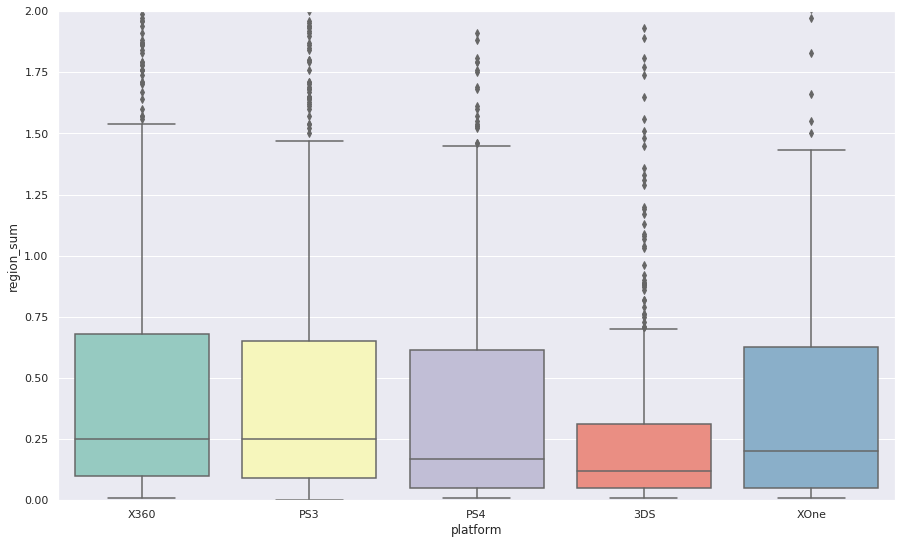

In [14]:
top_5_for_games = start_df.query('year_of_release >= 2011').groupby(['platform'],
            as_index = False)['region_sum'].sum().sort_values('region_sum',
                                ascending = False).head(5)['platform'].tolist()
sns.set(rc={'figure.figsize':(15,9)})
ax = sns.boxplot(x="platform", y="region_sum", data= start_df.query('platform in @top_5_for_games') , palette="Set3")
ax.set(ylim=(0,2))

Построенные распределения для всех 5 топ платформ практически идентичны. Только один из 5 отличается 3DS, но она  так же отличается и по своему типу. (является не стационарной, а компактной приставкой, чем скорее всего и обусловлена такая разница ).

Рассмотрим на примере игровой платформы PS4 влияют ли оценки критиков и самих пользователей на продажи игр

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25984e14e0>,
      dtype=object)

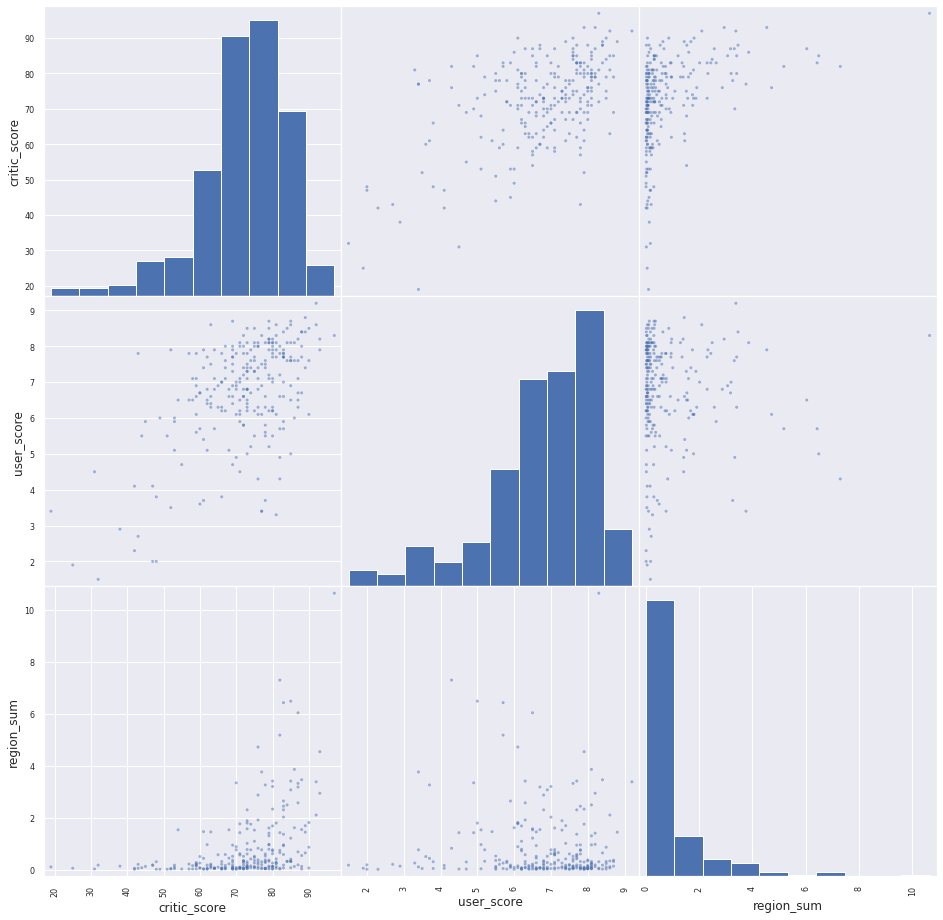

In [15]:
interest_platform = 'PS4'
#PS_4_games_rating = start_df.query('platform == @interest_platform').groupby(['platform'], 
#            as_index = False)['region_sum'].sum().sort_values('region_sum', 
#                                ascending = False)
PS_4_games_rating = start_df[['platform','critic_score','user_score','region_sum']].query('(platform == @interest_platform) & (critic_score != 0) & (user_score != -1)').sort_values('region_sum', 
                                ascending = False)
pd.plotting.scatter_matrix(PS_4_games_rating, figsize = (16,16))

In [16]:
print(PS_4_games_rating.corr())

              critic_score  user_score  region_sum
critic_score      1.000000    0.557654    0.405223
user_score        0.557654    1.000000   -0.032923
region_sum        0.405223   -0.032923    1.000000


Связи между оценками самих пользователей и итоговыми продажами вообще не просматривается (скорее всего потому что пользователи не выставляют некую среднюю оценку из нескольких критериев ), между оценками критиков и итоговыми продажами из графика все же просматривается зависимость, чем выше оценка тем больше высокоприбыльных проектов (все таки критики оценивают по отдельности ряд категорий и итоговая оценку - средняя из них)

Посмотрим на общее распределение игр по жанрам

In [17]:
top_for_games_count = start_df.query('year_of_release >= 2014').groupby(['genre'],
            as_index = False)['platform'].count().sort_values('platform',
                                ascending = False)
top_for_games_count

,genre,platform
0,Action,619
7,Role-Playing,221
1,Adventure,185
10,Sports,161
8,Shooter,128
3,Misc,113
6,Racing,69
2,Fighting,60
9,Simulation,44
4,Platform,38


Самой большое количество игр представлено в жанре Action причем от ближайшего преследователя практически в 3 раза перевес. Посмотрим Выделяется ли какой жанр в плане выручки на фоне остальных

In [18]:
top_for_games_sum = start_df.query('year_of_release >= 2014').groupby(['genre'],
            as_index = False)['region_sum'].sum().sort_values('region_sum',
                                ascending = False)
top_for_games_sum 

,genre,region_sum
0,Action,176.79
8,Shooter,149.41
10,Sports,95.12
7,Role-Playing,92.80
3,Misc,33.52
2,Fighting,25.49
6,Racing,24.63
4,Platform,16.28
1,Adventure,15.73
9,Simulation,12.24


Получили в топе 2 жанра  action и shooter. Из этих двух второй имеет значительное преимущество на первым в том, что при меньшем количестве игр приход почти такой же. Объединим их и посчитаем средний доход за 1 игру для каждого жанра (по моему мнению это лучше всего отразит какой жанр с большей вероятностью будет более прибыльным)

In [19]:
top_games = pd.merge(left = top_for_games_count, right = top_for_games_sum, how = 'left', left_on = ['genre'], right_on = ['genre'])
top_games['mean_profit'] = top_games['region_sum'] / top_games['platform'] 
top_games = top_games.sort_values('mean_profit', ascending = False)
top_games

,genre,platform,region_sum,mean_profit
4,Shooter,128,149.41,1.167266
3,Sports,161,95.12,0.590807
9,Platform,38,16.28,0.428421
7,Fighting,60,25.49,0.424833
1,Role-Playing,221,92.80,0.419910
6,Racing,69,24.63,0.356957
5,Misc,113,33.52,0.296637
0,Action,619,176.79,0.285606
8,Simulation,44,12.24,0.278182
11,Puzzle,14,2.10,0.150000


Из таблицы получается что самый прибыльная  игра в жанре shooter по среднему профиту опережает ближайшего преследователя в 2 раза

Составим портрет пользователя для каждого региона. Начнем с самых популярных жанров, затем популярные платформы. (выбираем по прибыли от игр в жанре и по платформам)

In [20]:
top_genre_na = start_df.query('year_of_release >= 2014').groupby(['genre'],
            as_index = False)['na_sales'].sum().sort_values('na_sales',
                                ascending = False).head(5)
top_genre_na

,genre,na_sales
8,Shooter,79.02
0,Action,72.53
10,Sports,46.13
7,Role-Playing,33.47
3,Misc,15.05


In [21]:
top_genre_eu = start_df.query('year_of_release >= 2014').groupby(['genre'],
            as_index = False)['eu_sales'].sum().sort_values('eu_sales',
                                ascending = False).head(5)
top_genre_eu

,genre,eu_sales
0,Action,74.68
8,Shooter,65.52
10,Sports,45.73
7,Role-Playing,28.17
6,Racing,14.13


In [22]:
top_genre_jp = start_df.query('year_of_release >= 2014').groupby(['genre'],
            as_index = False)['jp_sales'].sum().sort_values('jp_sales',
                                ascending = False).head(5)
top_genre_jp

,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87


Во всех 3 регионов жанр Action попадает в топ 2, в EU и NA вторым топом являются shooter в свою очередь в JP это roleplay для объяснения почему именно так по идее нужно лучше знать каждый регион, но на вскидку можно предположить , что может быть в JP секторе пользователи более настроены на вживание в роль своего героя и 'проживание' его жизни(и возможно проводят больше времени в игре ), в то время как в оставшихся двух регионах и жизнь сама по себе происходит быстрее так же как и в динамичных шутерах.

  platform  na_sales
3      PS4     98.61
9     XOne     81.27
8     X360     28.30
0      3DS     22.64
2      PS3     22.05


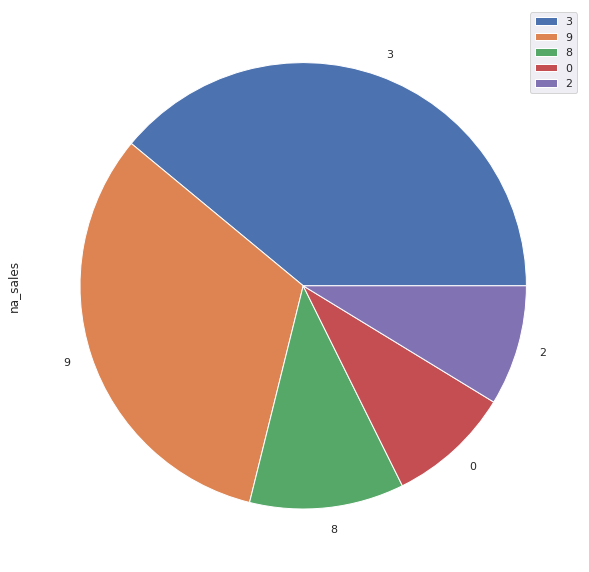

In [23]:
top_platform_na = start_df.query('year_of_release >= 2014').groupby(['platform'],
            as_index = False)['na_sales'].sum().sort_values('na_sales',
                                ascending = False).head(5)
top_platform_na.plot(y = 'na_sales', kind = 'pie', figsize = (10,20))
print(top_platform_na)

  platform  eu_sales
3      PS4    130.04
9     XOne     46.25
2      PS3     25.54
1       PC     17.97
0      3DS     16.12


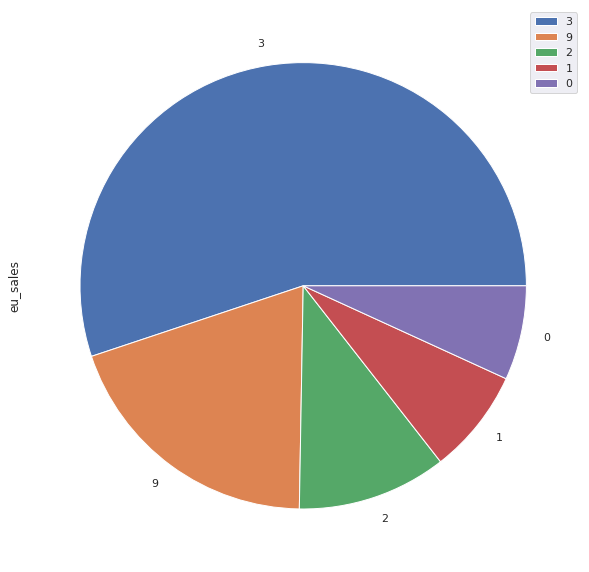

In [24]:
top_platform_eu = start_df.query('year_of_release >= 2014').groupby(['platform'],
            as_index = False)['eu_sales'].sum().sort_values('eu_sales',
                                ascending = False).head(5)
top_platform_eu.plot(y = 'eu_sales', kind = 'pie', figsize = (10,20))
print(top_platform_eu)

  platform  jp_sales
0      3DS     44.24
3      PS4     15.02
5      PSV     14.54
2      PS3     11.22
7     WiiU      7.31


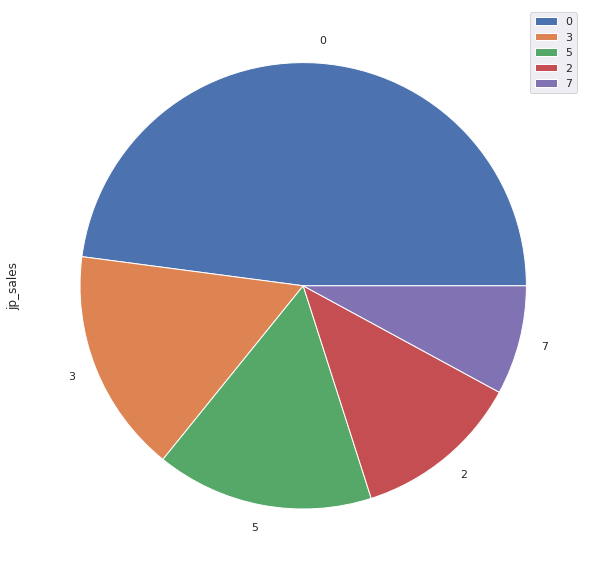

In [25]:
top_platform_jp = start_df.query('year_of_release >= 2014').groupby(['platform'],
            as_index = False)['jp_sales'].sum().sort_values('jp_sales',
                                ascending = False).head(5)
top_platform_jp.plot(y = 'jp_sales', kind = 'pie', figsize = (10,20))
print(top_platform_jp)

Во всех регионах PS4 является одной из лидирующих платформ, в EU и NA так же лидирует Xone. В JP  топ 1 занимает компактная платформа 3DS что скорее всего обуславливается проведением большого количества времени в транспорте (помогает сглаживать время) и так же это их национальное производство

Перейдем к проверкам гипотез, сформулируем их .  
Гипотеза 1 средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
Гипотеза 2 средние пользовательские рейтинги жанров Action  и Sports одинаковые

Начнем с первой .

In [26]:
list_xbox = start_df['user_score'][start_df['platform'] == 'XOne'].tolist()
list_pc = start_df['user_score'][start_df['platform'] == 'PC'].tolist()
results = st.ttest_ind(list_xbox, list_pc)
alpha = 0.05
print('p-значение:', results.pvalue)
if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0010259813499343441
Отвергаем нулевую гипотезу


Отвергаем первую гипотезу - средние пользовательские оценки на xbox и pc различаются 

In [27]:
print('Дисперсия оценок для игра жанра Action = ',np.var(start_df.query('genre == "Action"')['user_score']))
print('Дисперсия оценок для игра жанра Sports = ',np.var(start_df.query('genre == "Sports"')['user_score']))
print('Дисперсия оценок для игра платформы Xbox = ',np.var(start_df.query('platform == "XOne"')['user_score']))
print('Дисперсия оценок для игра жанра PC = ',np.var(start_df.query('platform == "PC"')['user_score']))

Дисперсия оценок для игра жанра Action =  17.198931599296255
Дисперсия оценок для игра жанра Sports =  17.00584700016542
Дисперсия оценок для игра платформы Xbox =  12.36705305774558
Дисперсия оценок для игра жанра PC =  12.611255022789654



Т.к. значения дисперсий интересующих нас совокупностей примерно равны (попарно разумеется), при применения в дальнейшем метода  st.ttest_ind значение equal_var будет = True (но в самом коде не будем это отображать т.к.  этот параметр берется таким по умолчанию по умолчанию)

In [28]:
list_action = start_df['user_score'][start_df['genre'] == 'Action'].tolist()
list_sports = start_df['user_score'][start_df['genre'] == 'Sports'].tolist()
results = st.ttest_ind(list_action, list_sports, )
alpha = 0.05
print('p-значение:', results.pvalue)
if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.2025568367391132e-08
Отвергаем нулевую гипотезу


И снова отвергаем нулевую теорию , т.е. средние пользовательские оценки для этих двух жанров различаются

## Вывод

Был изучен и обработан входящий фрейм,пропуски в столбцах были заменены на маркеры, были посчитаны суммарная прибыль с 3 -х регионов и добавленав изначальный фрейм.  Был выбран актуальный период для исследования (с 2012 года), выявлена приберный характерный "срок жизни" платформ - примерно 10 лет. Выявлена слабая зависимость прибыли от проекта с оценками критиков и полное отсутсвие такой связи с оценками пользователей. Был построен портрет пользователя для каждого региона. Проверены и опровержены две сформулированных нулевых теории .   
Основной целью было определяющие успешность игры закономерности. В результате проведенной работы можно сделать вывод, что высокий шанс на успех будет иметь игра в жанре Action + Shooter на платформах Xbox one и PS 4